In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# During Plot I used gray_r to reverse , such that the image will appear better

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
from matplotlib import pyplot
import cv2
import os
import numpy as np
from numpy import expand_dims
from numpy import  zeros
from numpy import  ones
from numpy import  vstack
from numpy.random import  randn
from numpy.random import  randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential, load_model as keras_load_model
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from matplotlib import pyplot
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# Data Augumentation

### Agumented data is 50002 images

In [ ]:
# import cv2
# import numpy as np
# import os

# # Define the directory containing your 500 images.
# input_dir = '/content/drive/MyDrive/train_images'

# # Create a directory to save the augmented images.
# output_dir = '/content/drive/MyDrive/Hackathon/augmented_images'
# os.makedirs(output_dir, exist_ok=True)

# # List of image filenames in the input directory.
# image_files = os.listdir(input_dir)

# # Number of augmented images to generate per input image.
# num_augmentations = 100

# # Transformation parameters (adjust as needed).
# rotation_angles = [-10, 0, 10]  # Rotation angles in degrees.
# scale_factors = [0.8, 1.0, 1.2]  # Scaling factors.

# # Loop through each input image.
# for image_file in image_files:
#     # Load the original image.
#     original_image = cv2.imread(os.path.join(input_dir, image_file))

#     # Perform data augmentation.
#     for i in range(num_augmentations):
#         augmented_image = original_image.copy()

#         # Apply random transformations.
#         angle = np.random.choice(rotation_angles)
#         scale = np.random.choice(scale_factors)

#         # Rotate the image.
#         if angle != 0:
#             rows, cols, _ = augmented_image.shape
#             M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, scale)
#             augmented_image = cv2.warpAffine(augmented_image, M, (cols, rows))

#         # Save the augmented image.
#         output_file = f'{output_dir}/{os.path.splitext(image_file)[0]}_{i}.jpg'
#         cv2.imwrite(output_file, augmented_image)

# print("Augmentation complete.")



# Plot to know my dataset

### Run after running the real_data function

In [ ]:
# for i in range(25):
#  # define subplot
#  pyplot.subplot(5, 5, 1 + i)
#  # turn off axis
#  pyplot.axis('off')
#  # plot raw pixel data
#  pyplot.imshow(images[i], cmap='gray_r')
# pyplot.show()

# Code for the GAN

In [ ]:
import os


folder_path = '/content/drive/MyDrive/Hackathon/augmented_images'

def generator(dimension):
	model = Sequential()

	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=dimension))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model


def discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model


def gan(g_model, d_model):

	d_model.trainable = False

	model = Sequential()

	model.add(g_model)

	model.add(d_model)

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

def real_data(folder_path):

    images = []


    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)


            img = 255 - img


            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


            resized_image = cv2.resize(gray_image, (28, 28))


            final_image = np.expand_dims(resized_image, axis=-1)


            final_image = final_image.astype('float32')
            final_norm = final_image / 255.0


            images.append(final_norm)


    image = np.array(images)

    return image

def fake_points(dimension, sample_number):

	x_input = randn(dimension * sample_number)

	x_input = x_input.reshape(sample_number, dimension)
	return x_input


def creating_real_image_sample(dataset, sample_number):

	ix = randint(0, dataset.shape[0], sample_number)

	X = dataset[ix]

	y = ones((sample_number, 1))
	return X, y



def creating_fake_image(g_model, dimension, sample_number):

	x_input = fake_points(dimension, sample_number)

	X = g_model.predict(x_input)

	y = zeros((sample_number, 1))
	return X, y


def saving_generated_images(examples, epoch, n=10):

	for i in range(n * n):

		pyplot.subplot(n, n, 1 + i)

		pyplot.axis('off')

		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')

	filename = 'plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()


def overall(epoch, g_model, d_model, dataset, dimension, sample_number=100):

	real_x, real_y = creating_real_image_sample(dataset, sample_number)

	_, real_accuracy = d_model.evaluate(real_x, real_y, verbose=0)

	fake_x, fake_y = creating_fake_image(g_model, dimension, sample_number)

	_, fake_accuracy = d_model.evaluate(fake_x, fake_y, verbose=0)

	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (real_accuracy*100, fake_accuracy*100))

	saving_generated_images(fake_x, epoch)
	# save the generator model tile file
	filename = 'model_%03d.h5' % (epoch + 1)
	g_model.save(filename)


def train(g_model, d_model, gan_model, dataset, dimension, n_epochs=100, batch_number=256):
	batch_epoch = int(dataset.shape[0] / batch_number)
	half_batch = int(batch_number / 2)

	for i in range(n_epochs):

		for j in range(batch_epoch):
			# get randomly selected 'real' samples
			real_x, real_y = creating_real_image_sample(dataset, half_batch)
			# generate 'fake' examples
			fake_x, fake_y = creating_fake_image(g_model, dimension, half_batch)
			# create training set for the discriminator
			X, y = vstack((real_x, fake_x)), vstack((real_y, fake_y))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = fake_points(dimension, batch_number)
			# create inverted labels for the fake samples
			y_gan = ones((batch_number, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, batch_epoch, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			overall(i, g_model, d_model, dataset, dimension)

# size of the latent space
dimension = 100
# create the discriminator
d_model = discriminator()
# create the generator
g_model = generator(dimension)
# create the gan
gan_model = gan(g_model, d_model)
# load image data
dataset = real_data(folder_path)
print(dataset.shape)
# train model
train(g_model, d_model, gan_model, dataset, dimension)


# Image generated by using 100th epoch model

## **Since data Agumentation used here,so the border lines appers due to rotation , I also tried to run the algorithm on the dataset whose border black pixel converted into white during augumentation but the results are not good on it . So I go with it.**

1/1 [==============================] - 1s 655ms/step


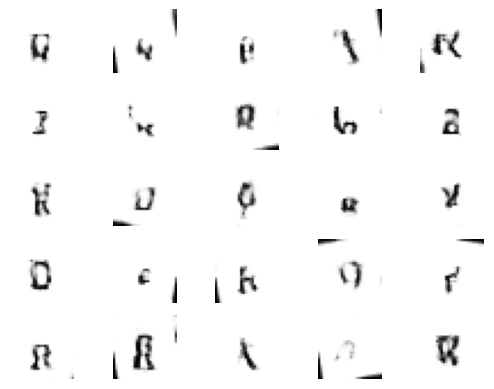

In [ ]:
# Model load and generate image


def create_points(latent_dim, n_samples):

	x_input = randn(latent_dim * n_samples)

	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input


def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)

		pyplot.axis('off')

		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()


model = load_model('/content/drive/MyDrive/Hackathon/Models/model_100.h5')

latent_points = create_points(100, 25)

X = model.predict(latent_points)

save_plot(X, 5)

# Images shown below for interval of 10 batches till 100.

### In each plot there is 10 by 10 images means, total 100 generated images are available here for each 10 epochs

 AFTER 10 EPOCH


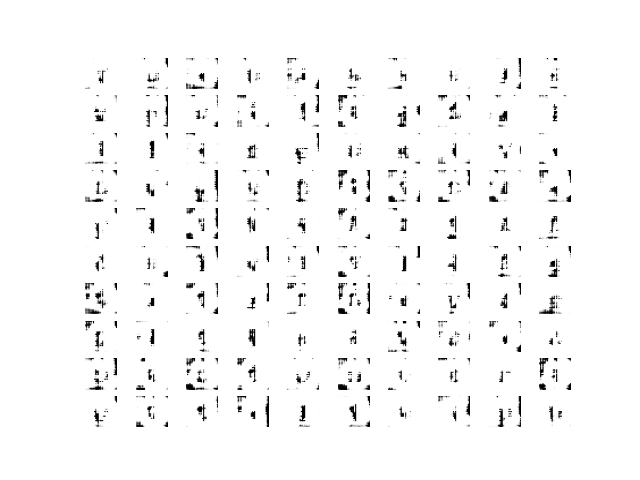

In [ ]:
from IPython.display import Image


image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e010 .png'

print(' AFTER 10 EPOCH')
Image(filename=image_path)
# 100 image in each figure

 AFTER 20 EPOCH


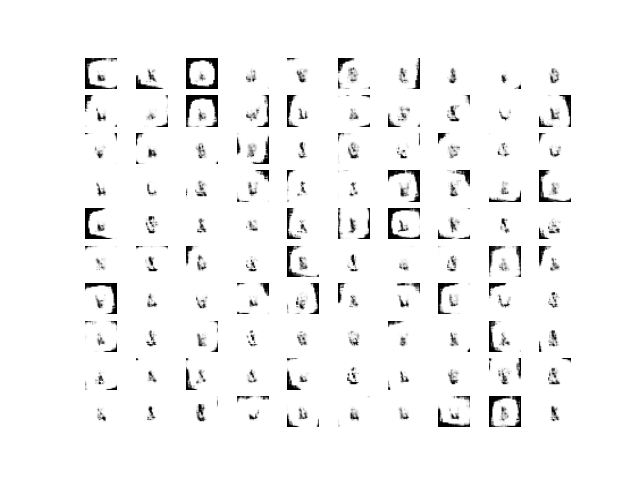

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e020 .png'

print(' AFTER 20 EPOCH')
Image(filename=image_path)

 AFTER 30 EPOCH


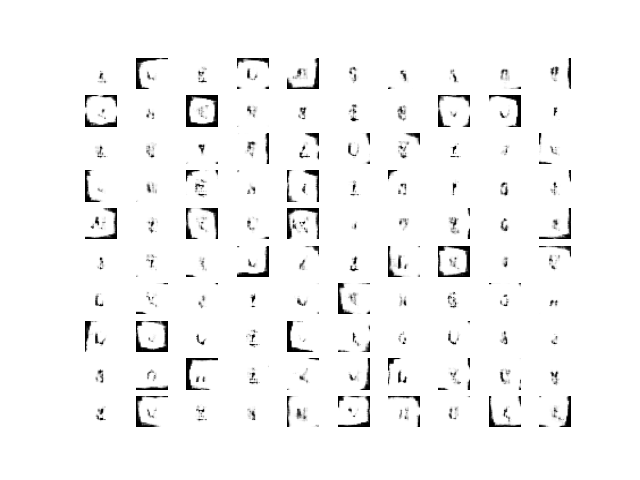

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e030 .png'

print(' AFTER 30 EPOCH')
Image(filename=image_path)

 AFTER 30 EPOCH


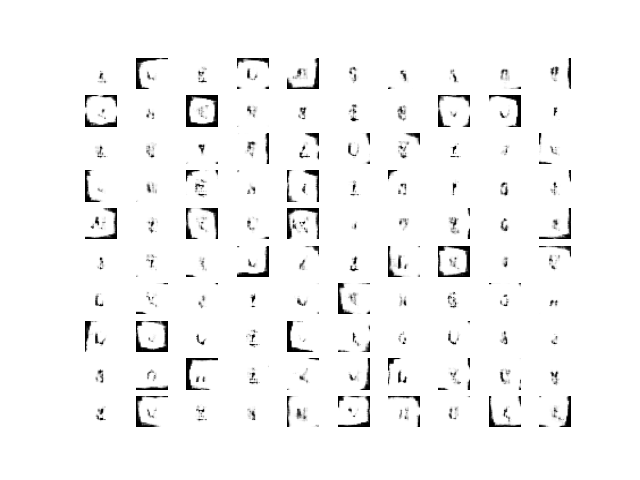

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e030 .png'

print(' AFTER 30 EPOCH')
Image(filename=image_path)

 AFTER 40 EPOCH


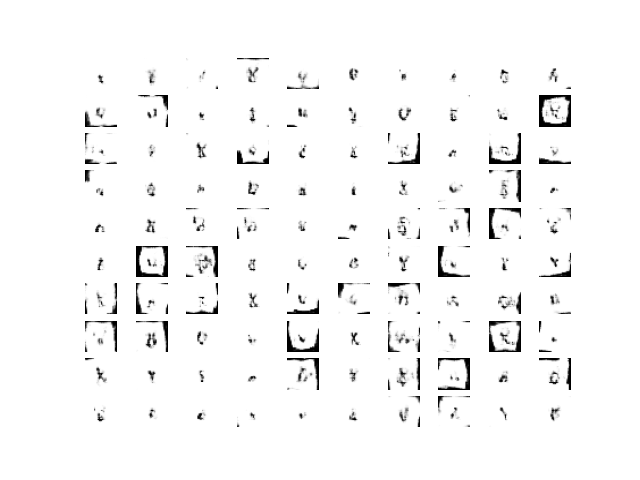

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e040 .png'

print(' AFTER 40 EPOCH')
Image(filename=image_path)

 AFTER 50 EPOCH


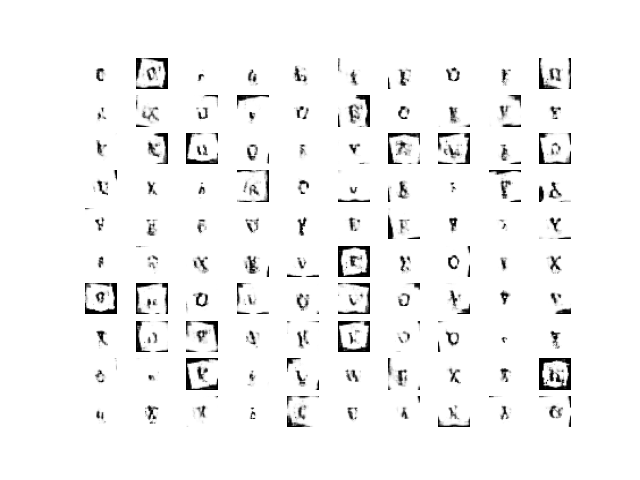

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e050 .png'

print(' AFTER 50 EPOCH')
Image(filename=image_path)

 AFTER 60 EPOCH


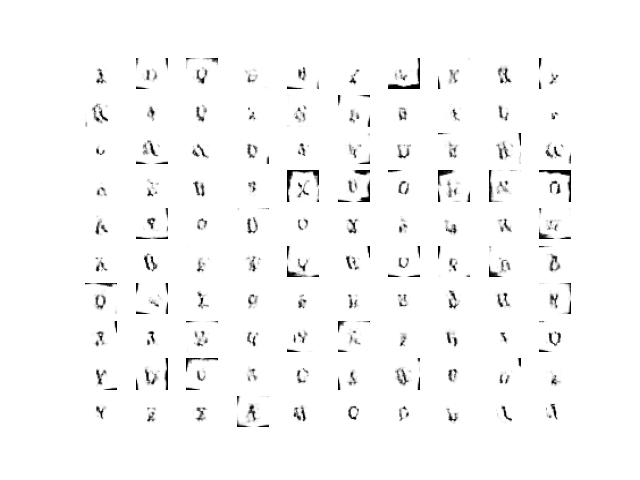

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e060 .png'

print(' AFTER 60 EPOCH')
Image(filename=image_path)

 AFTER 70 EPOCH


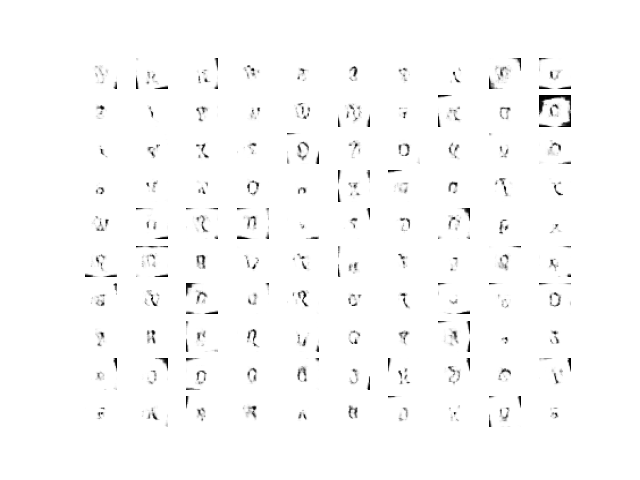

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e070.png'

print(' AFTER 70 EPOCH')
Image(filename=image_path)

 AFTER 80 EPOCH


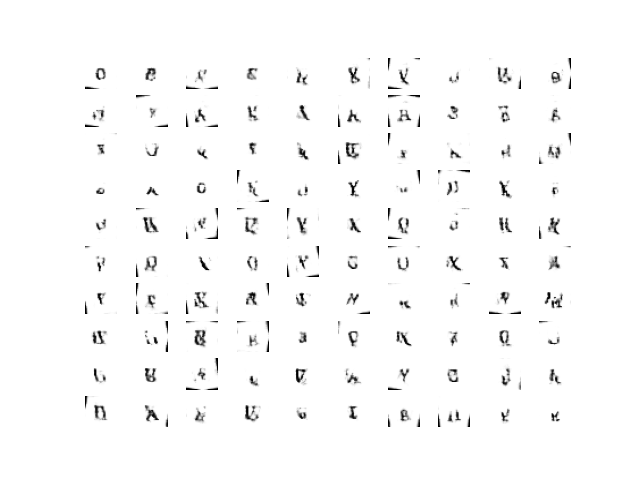

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e080 .png'

print(' AFTER 80 EPOCH')
Image(filename=image_path)

 AFTER 90 EPOCH


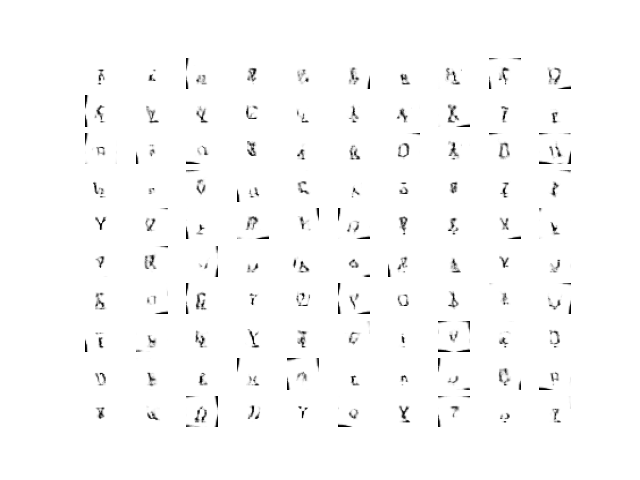

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e090 .png'

print(' AFTER 90 EPOCH')
Image(filename=image_path)

 AFTER 100 EPOCH


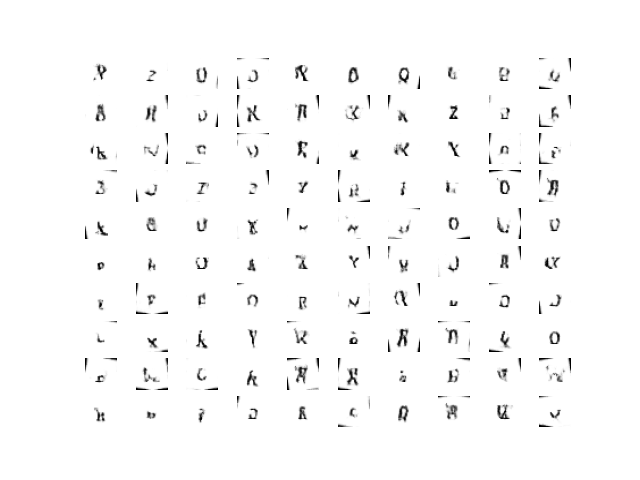

In [ ]:
image_path = '/content/drive/MyDrive/Hackathon/Image_generated/plot_e100 .png'

print(' AFTER 100 EPOCH')
Image(filename=image_path)

### After every 10 epoch the border disturbance is reducing,which generate during data augmentation, I keep it because with this the generated images are good

## Thank You, I hope you will consider me :)